In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [32]:
file_path = 'C:/Users/chris/Downloads/singlecell_result/final_Result'

In [33]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

####### data 불러오기 #########
tpm_dataframe = pd.read_csv('%s/HNSCC_all_data.csv' % file_path, index_col=0, dtype = object)

# gene 이름에 작은따옴표가 포함되어 있어서 제거하여준다.
tpm_row_name = []
for i in list(tpm_dataframe.index) :
    j = i.strip("'")
    tpm_row_name.append(j)
tpm_dataframe.index = tpm_row_name


####### 10개의 sample 추출 ########
# 컬럼명의 리스트를 만들어서, 해당 컬럼명을 '_'기준으로 split한다.
# 앞 부분이 sample명 이므로, 뽑아준다. 
tpm_columns = list(tpm_dataframe.columns)
sample_name = []
for string in tpm_columns :
    string_split = string.split('_')
    sample_name.append(string_split[0])

# 해당 sample이름을 가지는 list의 index반환
HN5 = list(filter(lambda x:sample_name[x] == "HN5", range(len(sample_name))))
HNSCC5 = list(filter(lambda x:sample_name[x] == "HNSCC5", range(len(sample_name))))
HN25 = list(filter(lambda x:sample_name[x] == "HN25", range(len(sample_name))))
HNSCC25 = list(filter(lambda x:sample_name[x] == "HNSCC25", range(len(sample_name))))
HNSCC17 = list(filter(lambda x:sample_name[x] == "HNSCC17", range(len(sample_name))))
HNSCC18 = list(filter(lambda x:sample_name[x] == "HNSCC18", range(len(sample_name))))
HNSCC16 = list(filter(lambda x:sample_name[x] == "HNSCC16", range(len(sample_name))))
HNSCC22 = list(filter(lambda x:sample_name[x] == "HNSCC22", range(len(sample_name))))
HN28 = list(filter(lambda x:sample_name[x] == "HN28", range(len(sample_name))))
HNSCC28 = list(filter(lambda x:sample_name[x] == "HNSCC28", range(len(sample_name))))
HN26 = list(filter(lambda x:sample_name[x] == "HN26", range(len(sample_name))))
HNSCC26 = list(filter(lambda x:sample_name[x] == "HNSCC26", range(len(sample_name))))
HN20 = list(filter(lambda x:sample_name[x] == "HN20", range(len(sample_name))))
HNSCC20 = list(filter(lambda x:sample_name[x] == "HNSCC20", range(len(sample_name))))
HNSCC6 = list(filter(lambda x:sample_name[x] == "HNSCC6", range(len(sample_name))))

reduced_sample_index = ( HN5 + HNSCC5 + HN25 + HNSCC25 + HNSCC17 +
                        HNSCC18 + HNSCC16 + HNSCC22 + HN28 + HNSCC28 + HN26 + HNSCC26
                        + HN20 + HNSCC20 + HNSCC6 )


####### cell별로 sample name지정 ########

# 함수 patient_meta : cell별로 sample이름에 대한 list를 만든다.
def patient_meta(cell_list, patient_name) :
    patient_list = []
    for i in range(len(cell_list)) :
        patient_list.append(patient_name)
    return patient_list

p_HN5 = patient_meta(HN5, "P5")
p_HNSCC5 = patient_meta(HNSCC5, "P5")
p_HN25 = patient_meta(HN25, "P25")
p_HNSCC25 = patient_meta(HNSCC25, "P25")
p_HNSCC17 = patient_meta(HNSCC17, "P17")
p_HNSCC18 = patient_meta(HNSCC18, "P18")
p_HNSCC16 = patient_meta(HNSCC16, "P16")
p_HNSCC22 = patient_meta(HNSCC22, "P22")
p_HN28 = patient_meta(HN28, "P28")
p_HNSCC28 = patient_meta(HNSCC28, "P28")
p_HN26 = patient_meta(HN26, "P26")
p_HNSCC26 = patient_meta(HNSCC26, "P26")
p_HN20 = patient_meta(HN20, "P20")
p_HNSCC20 = patient_meta(HNSCC20, "P20")
p_HNSCC6 = patient_meta(HNSCC6, "P6")

# list들을 합쳐 dataframe에 추가할 patient name list를 만들었다.
reduced_patient_name = (p_HN5 + p_HNSCC5 + p_HN25 + p_HNSCC25
                        + p_HNSCC17 + p_HNSCC18 + p_HNSCC16 + p_HNSCC22
                        + p_HN28 + p_HNSCC28 + p_HN26 + p_HNSCC26 + p_HN20 + p_HNSCC20
                        + p_HNSCC6)

# reduced dataframe을 만들어준다. 
reduced_tpm_dataframe_5sample = tpm_dataframe.iloc[:,reduced_sample_index]

# reduced dateframe 끝 행에 sample 이름 data를 추가한다.
main_df_5s = reduced_tpm_dataframe_5sample.copy()
main_df_5s.loc['sample name'] = reduced_patient_name

###### p-EMT marker genes의 expression average #######

# reduced dateframe 끝 행에 p-EMT marker에 대해 expression 값을 평균낸다.
p_emt_gene = main_df_5s.loc[["TGFBI", "LAMC2", "PDPN", "ITGA5", "VIM", "MMP10", "SERPINE1", "P4HA2", "LAMA3", "CDH13", "TNC" ], :]

mean_list = []
for i in range(p_emt_gene.shape[1]) :
    total = 0
    for j in range(p_emt_gene.shape[0]) :
        total += float(p_emt_gene.iloc[j,i])
    total = total / 11
    mean_list.append(total)
    
# datafame 끝에 해당 값을 추가한다.
main_df_5s.loc['average p-EMT'] = mean_list

# sample name과 average p-EMT가 잘 들어갔나 확인했다.
main_df_5s.tail()


###### malignant cell만 추출 #######
# LN은 제외하고, malignant cell의 index를 뽑아준다.
malignant_index = []
for i in range(main_df_5s.shape[1]) :
    if (main_df_5s.loc["classified  as cancer cell",:][i] == '1' and
        main_df_5s.loc["Lymph node",:][i] == '0') :
        malignant_index.append(i)

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


normalizing counts per cell
    finished (0:00:00)


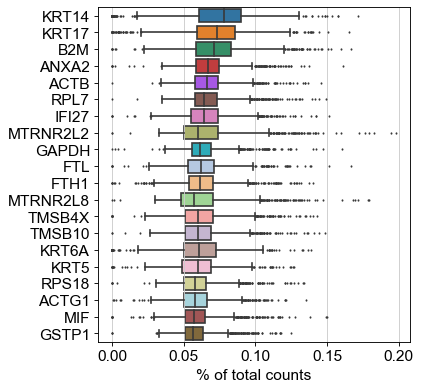

filtered out 4286 genes that are detected in less than 3 cells
... storing 'processed by Maxima enzyme' as categorical
... storing 'Lymph node' as categorical
... storing 'classified  as cancer cell' as categorical
... storing 'classified as non-cancer cells' as categorical
... storing 'non-cancer cell type' as categorical
... storing 'sample name' as categorical


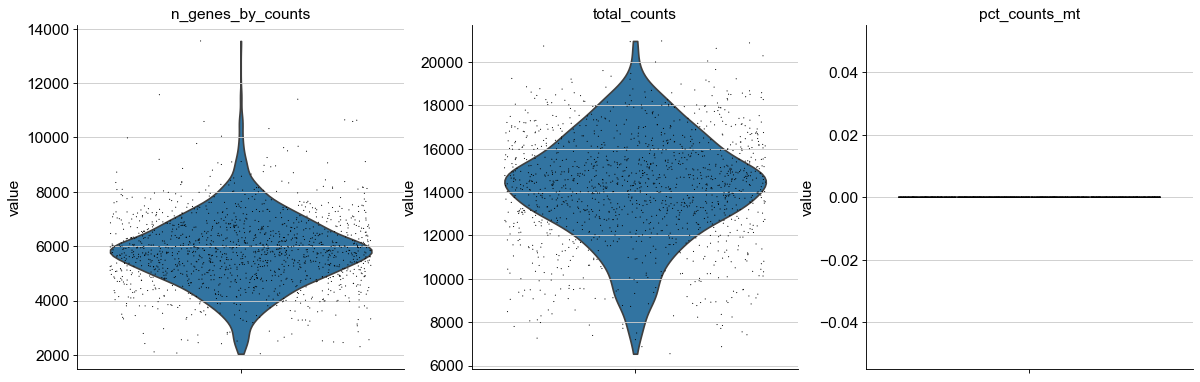

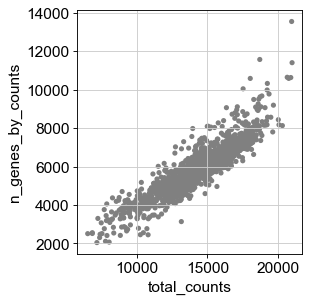

c:\users\chris\anaconda3\envs\py3.6\lib\site-packages\scanpy\preprocessing\_simple.py:375: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


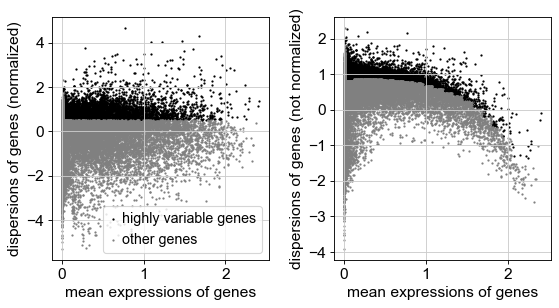

regressing out ['total_counts']
    finished (0:00:30)


In [5]:
######### 25번 샘플의 malignant cell만 남은 것을 전처리 #########
main_df_5s_malignant = main_df_5s.iloc[:,malignant_index]
main_df_5s_malignant = main_df_5s_malignant.transpose()
metadata_dataframe = main_df_5s_malignant.iloc[:,[0,1,2,3,4,23691,23692]]

# matrix에서 metadata는 삭제하고, tpm만 남겨주었다. 
main_df_5s_malignant = main_df_5s_malignant.drop(['processed by Maxima enzyme', 'Lymph node',
       'classified  as cancer cell', 'classified as non-cancer cells',
       'non-cancer cell type', 'sample name', 'average p-EMT'], 1)
adata = sc.AnnData(X = main_df_5s_malignant, obs = metadata_dataframe)
adata.raw = adata

sc.pl.highest_expr_genes(adata, n_top=20, ) # expression 양이 높은 top gene 20 을 뽑음
sc.pp.filter_cells(adata, min_genes=200) # 200개 이하의 gene을 발현하는 cell을 삭제함
sc.pp.filter_genes(adata, min_cells=3) # 3개 이하의 cell에서 발현되는 gene을 삭제함
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
# mitochondria gene은 존재하지 않음

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
adata = adata[adata.obs.n_genes_by_counts < 9000, :]
adata = adata[adata.obs.n_genes_by_counts > 1000, :]


sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

adata.raw = adata # adata.raw에는 기존의 전체 유전자 다 넣음

adata = adata[:, adata.var.highly_variable]
# adata에는 higly_variable gene만 남긴다.

sc.pp.regress_out(adata, ['total_counts'])
# Regress out (mostly) unwanted sources of variation

sc.pp.scale(adata, max_value=10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


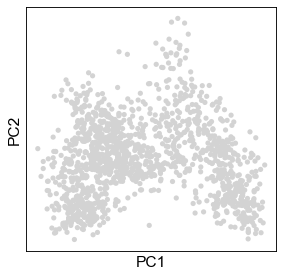

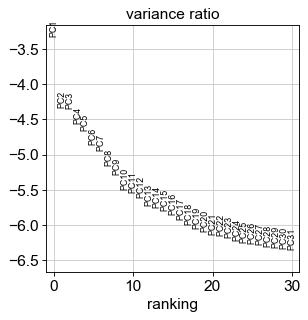

In [34]:
####### PCA ########
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)
adata.obsm['X_pca']
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


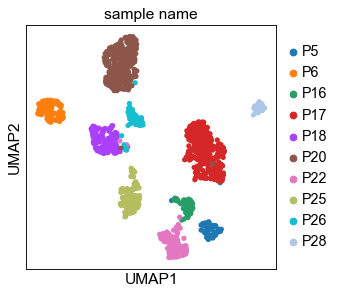

In [35]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata)

sc.pl.umap(adata, color = ["sample name"])
# 첫 번째 그래프를 보면, 5개의 sample별로 나누어 진 것을 확인할 수 있고,
# 두 번째 그래프의 경우, 1은 Lymph node이고, 0은 primary tumor이다. 


computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


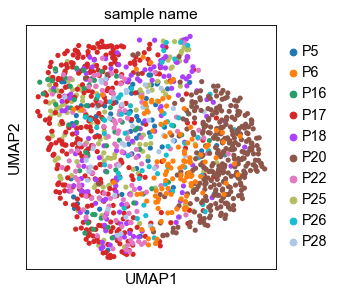

In [36]:
sc.external.pp.bbknn(adata, batch_key='sample name' )
sc.tl.umap(adata)
sc.pl.umap(adata, color=['sample name'])

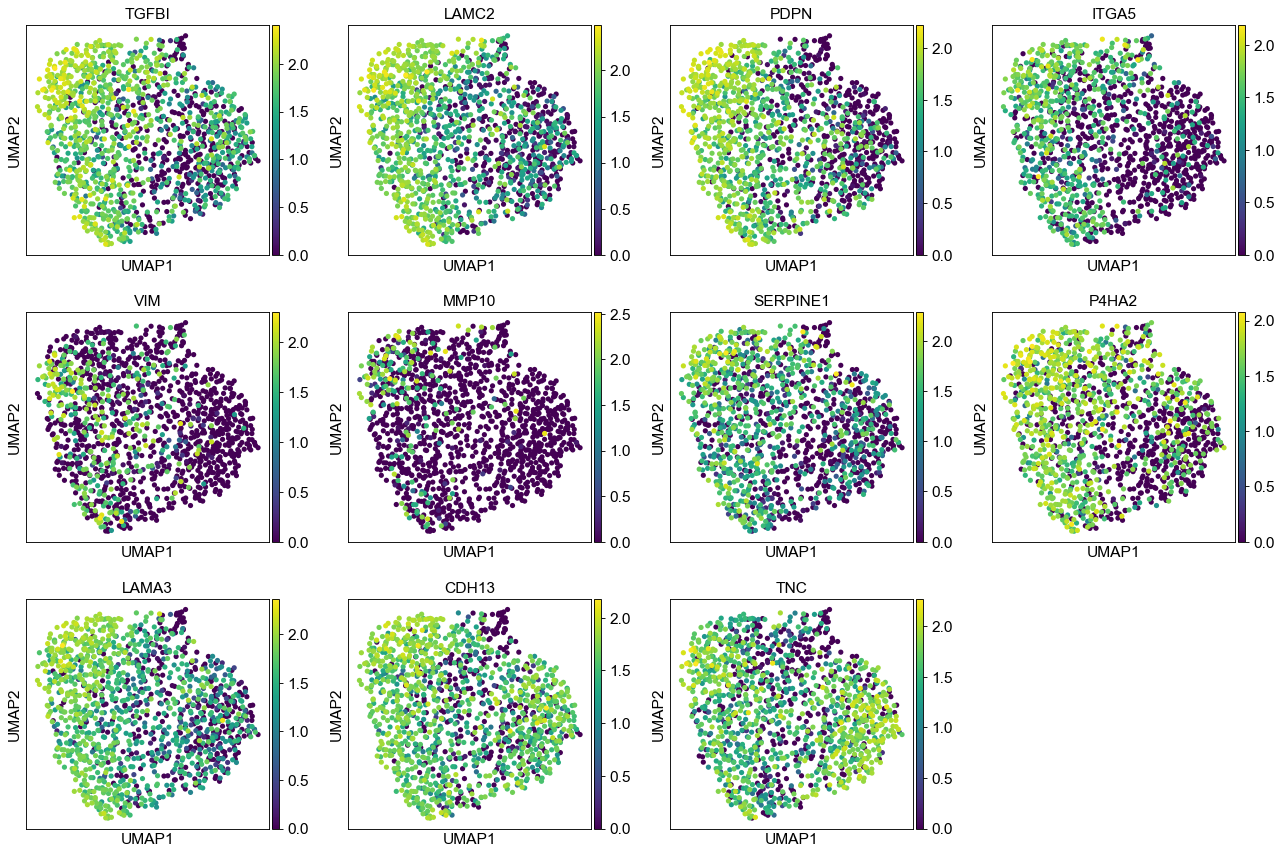

In [37]:
# 논문에서는 pEMT관련 유전자의 expression양에 따라서 cell을 ranked하였고,
# TGFBI부터 MMP10까지 correalation을 보이는 것을 supplementary figure에 나타내었음.
sc.pl.umap(adata, color=["TGFBI", "LAMC2", "PDPN", "ITGA5", "VIM","MMP10", "SERPINE1", "P4HA2", "LAMA3", "CDH13", "TNC"])

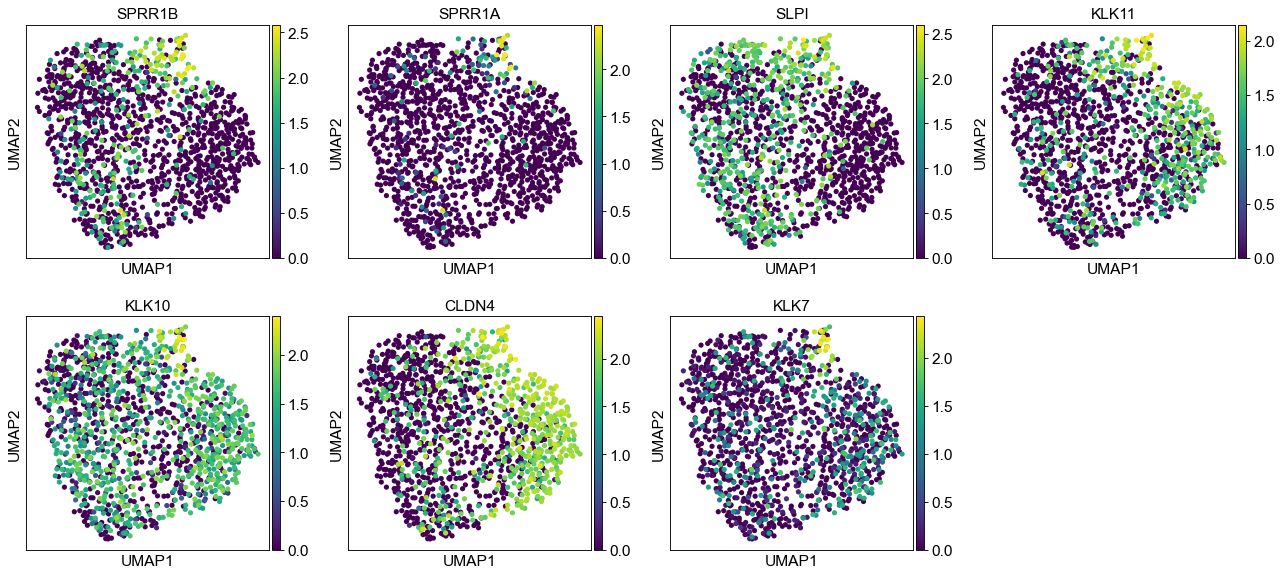

In [38]:
# ephitherial differenciation genes
sc.pl.umap(adata, color=["SPRR1B", "SPRR1A", "SLPI","KLK11", "KLK10","CLDN4", "KLK7"])

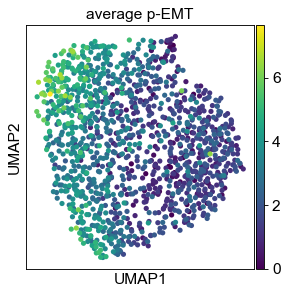

In [39]:
# average p-EMT
sc.pl.umap(adata, color=['average p-EMT'])

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.8853677  0.88384026 0.7922581  0.7706185  0.7544905
     0.737067   0.72719795 0.71746784 0.7126218  0.70559067 0.69931227
     0.69520277 0.6869207  0.6810532 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:17)


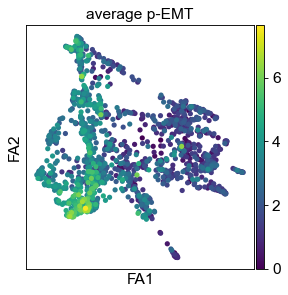

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


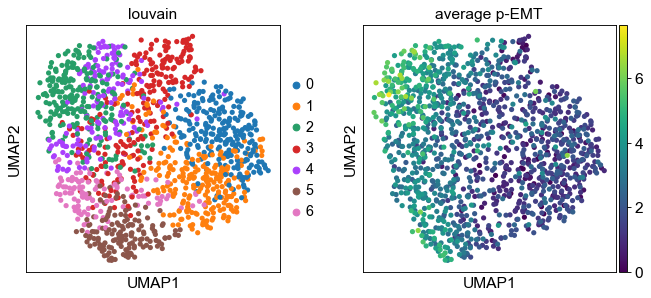

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


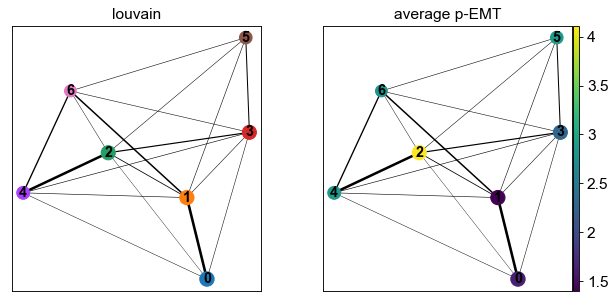

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


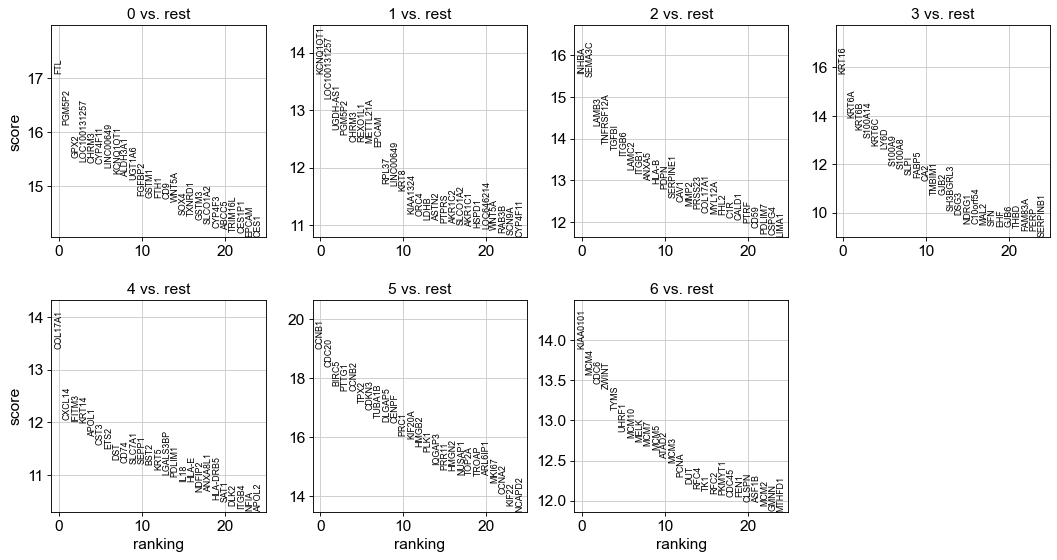

In [40]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_diffmap')
sc.tl.draw_graph(adata) # cluster간의 network에 대해 그림을 그릴 수 있다. 
sc.pl.draw_graph(adata, color = ['average p-EMT'], legend_loc='on data')
# PAGA를 하기 위하여 clustering을 한다.
sc.tl.louvain(adata, resolution=0.4)
sc.pl.umap(adata, color=['louvain','average p-EMT'])
# cluster간의 networks를 만든다. 
sc.tl.paga(adata, groups='louvain')
adata.uns['paga']
# 그림을 그린다.
sc.pl.paga(adata, color=['louvain', 'average p-EMT'])
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


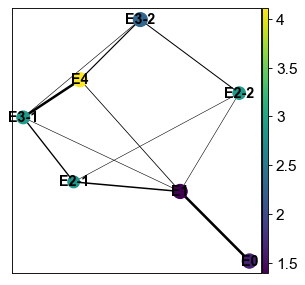

In [41]:
adata.obs['louvain_anno'] = adata.obs['louvain']
adata.obs['louvain_anno'].cat.categories =['E0', 'E1', 'E4', 'E3-2', 'E3-1', 'E2-2', 'E2-1']
sc.tl.paga(adata, groups='louvain_anno')
sc.pl.paga(adata, threshold = 0.065, color=['average p-EMT'] )

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:13)


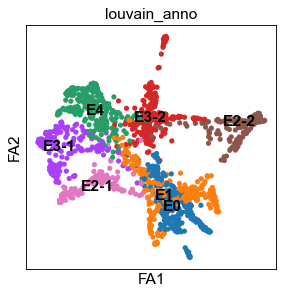

In [42]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['louvain_anno'], legend_loc='on data')

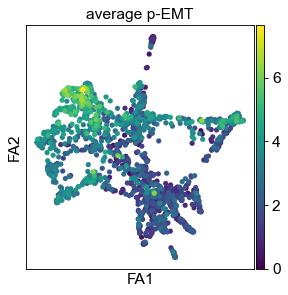

In [43]:
sc.pl.draw_graph(adata, color=['average p-EMT'], legend_loc='right margin')

--> added 'pos', the PAGA positions (adata.uns['paga'])


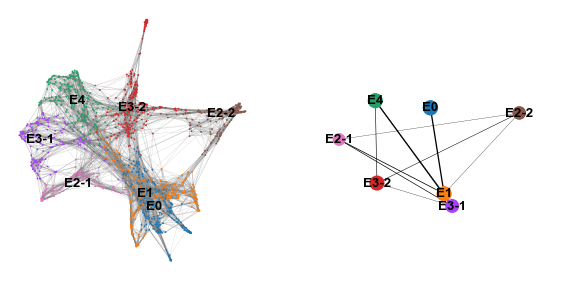

In [44]:
sc.pl.paga_compare(
    adata, threshold=0.065, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

In [45]:
# 해당 클러스터 내의 0번째 세포를 root로 지정함.
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain_anno']  == 'E0')[45]

In [46]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [47]:
gene_names = ["TGFBI", "LAMC2", "PDPN", "ITGA5", "VIM","MMP10", "SERPINE1", "P4HA2", "LAMA3", "CDH13", "TNC", "SPRR1B", "SPRR1A", "SLPI","KLK11", "KLK10","CLDN4", "KLK7"]

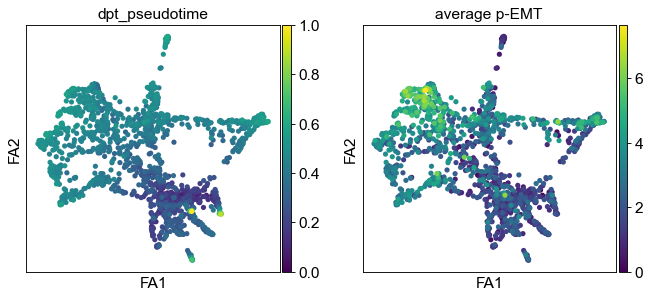

In [48]:
# 출발 부분이 0.0으로 가장 어둡다.
sc.pl.draw_graph(adata, color=['dpt_pseudotime', 'average p-EMT'], legend_loc='right margin')

In [49]:
paths = [('1', [0, 1, 6, 4, 2]),
         ('2', [0, 1, 5, 3, 2])]

In [50]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [51]:
adata.obs['clusters'] = adata.obs['louvain_anno']

In [52]:
adata.uns['clusters_colors'] = adata.uns['louvain_anno_colors']

c:\users\chris\anaconda3\envs\py3.6\lib\site-packages\scanpy\plotting\_tools\paga.py:1188: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
c:\users\chris\anaconda3\envs\py3.6\lib\site-packages\scanpy\plotting\_tools\paga.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  anno_axis.set_yticklabels(['', anno, ''], fontsize=ytick_fontsize)


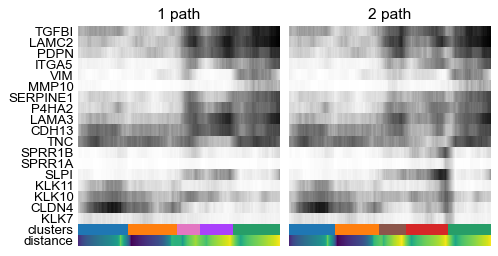

In [53]:
_, axs = pl.subplots(ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
pl.show()

In [54]:
##########EMT gene set에 있는 gene들의 발현량 평균을 구한다.############
# E4에 해당하는 세포들의 index를 뽑았다.
cluster_louvain = adata.obs[['louvain']]
E4_index = list(np.where(adata.obs.loc[:,['louvain_anno']]=='E4')[0])
# TPM데이터로부터 adata에 있는 세포들에 대하여 뽑아주었다. 
countrow = main_df_5s_malignant.index
metarow =adata.obs.index # 행 이름 추출
temp = list(set(countrow) - set(metarow))

In [55]:
emt_df = main_df_5s_malignant.drop(temp) # adata에서 제거된 cell에 대하여 삭제해줌
emt_df_list = list(emt_df.columns)

# 80개의 유전자 세트
emt_geneset_list = ['AKT1', 'AKT2', 'APC', 'AXIN2', 'GSK3B', 'CTNNB1', 'BTRC', 'CD44', 'CDC42', 'FOS', 'CHD1L', 'MET', 'RBPJ', 'COPS2', 'COPS3', 'COPS4', 'COPS5', 'COPS7A', 'COPS7B', 'COPS8', 'DLL1', 'DVL1', 'CDH1', 'EGFR', 'EGR1', 'MAPK1', 'MAPK3', 'FGFR1', 'FOXC2', 'FZD1', 'STK36', 'GLI1', 'GLI2', 'HEY1', 'HIF1A', 'IGF1R', 'CHUK', 'ILK', 'JAG1', 'SLC39A6', 'LOXL2', 'LOXL3', 'MAP2K1', 'MAP2K2', 'NFKB1', 'NOTCH1', 'PAK1', 'PTCH1', 'PDGFRA', 'PDGFRB', 'PIK3CA', 'PIK3CB', 'PIK3CG', 'RAF1', 'HRAS', 'SNAI2', 'SMAD2', 'SMAD3', 'SMAD4', 'SMO', 'SNAI1', 'SOS1', 'GRB2', 'SRC', 'STAT3', 'STAT1', 'SUFU', 'TCF4', 'LEF1', 'TGFB1', 'TGFBR1', 'TGFBR2', 'TWIST1', 'ZEB1', 'ZEB2', 'EGF', 'FGF2', 'HGF', 'GSC', 'IGF1', 'PDGFB']

emt_geneset_list_index = []
for i in range(0, len(emt_df_list), 1) :
    if emt_df_list[i] in emt_geneset_list : emt_geneset_list_index.append(i)

emt_geneset_list_E4_index = list(np.where(adata.obs.loc[:,['louvain_anno']]=='E4')[0])
emt_df = emt_df.iloc[emt_geneset_list_E4_index,emt_geneset_list_index]
emt_df = emt_df.astype('float')
emt_df.loc['average']=emt_df.mean(axis=0)

In [56]:
emt_average_df=emt_df.loc[['average']].transpose()

In [57]:
emt_average_df_sorted = emt_average_df.sort_values(by=['average'], axis=0, ascending=False)

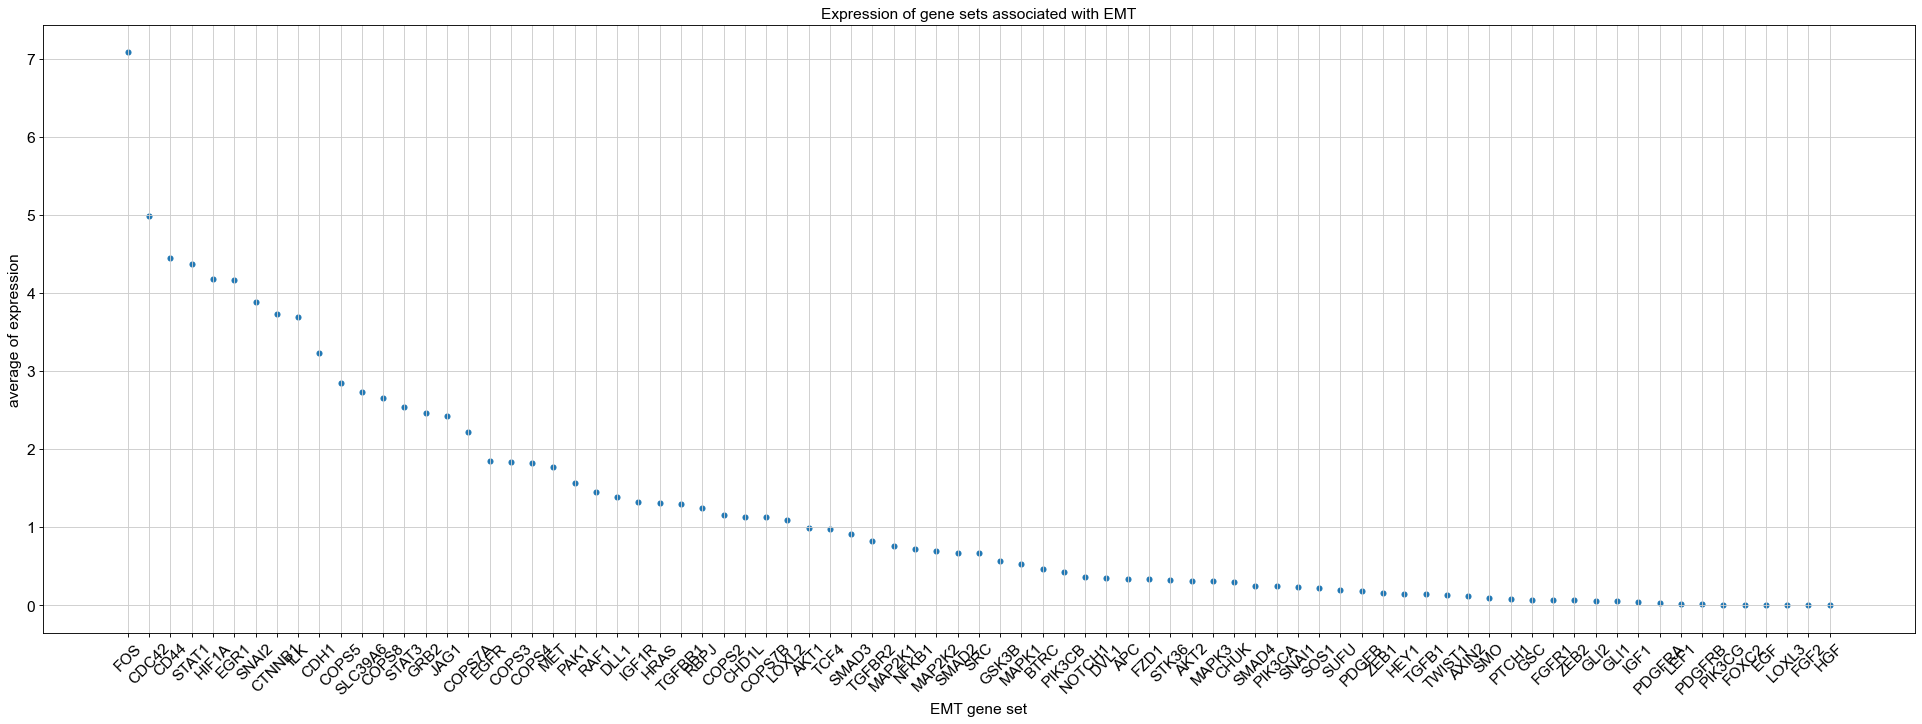

In [58]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
emt_average_df_sorted.reset_index().plot(kind='scatter', x='index', y='average')
plt.xlabel("EMT gene set")
plt.xticks(rotation=45)
plt.title("Expression of gene sets associated with EMT")
plt.ylabel("average of expression")
plt.show()